# Geographic Displays

This notebook doesn't work as use of Bokeh, Geoviews, Geopands, and other libraries are providing problematic.

## Mechanics

Install the following libraries:
+ geopandas  - Geoplot is a Python library providing a selection of easy-to-use geospatial visualizations. It is built on top of the lower-level CartoPy, covered in a separate section of this tutorial, and is designed to work with GeoPandas input. (https://geopandas.org/)
+ cartopy    - a solid geograhic library (https://scitools.org.uk/cartopy/docs/latest/)
+ datashader - api specifically designed to support showing large volumes of data (https://datashader.org/)
+ xarray     - 3D version of Pandas, very powerful and natively reads NetCDF's (http://xarray.pydata.org/en/stable/)
+ holoviews  - Another display capability (http://holoviews.org/)
+ geoviews   - Yet another... (https://geoviews.org/)
+ bokeh      - VERY solid implementation for interactive graphics. (https://docs.bokeh.org/en/latest/index.html)
+ contextily - contextily is a small Python 3 package to retrieve and write to disk tile maps from the internet into geospatial raster files. Bounding boxes can be passed in both WGS84 (EPSG:4326) and Spheric Mercator (EPSG:3857). (https://github.com/darribas/contextily)

`conda install -c conda-forge geopandas contextily cartopy datashader xarray holoviews geoviews bokeh`

### References
+ http://jonathansoma.com/lede/foundations-2017/classes/geopandas/mapping-with-geopandas/
+ https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0
+ https://geopandas.org/mapping.html
+ http://maps.stamen.com/#watercolor/12/37.7706/-122.3782

## Project Startup

In [1]:
# Let's define some variables (information holders) for our project overall
# If using GCP or a similar Cloud Service Provider (CSP), you might be required
# to provide project details.

global PROJECT_ID, BUCKET_NAME, LOCATION
BUCKET_NAME =""
PROJECT_ID  =""
LOCATION    =""

BOLD_START="\033[1m"
BOLD_END="\033[0m"

## Import Base Libraries

In [2]:
# Import key libraries necessary to support dynamic installation of additional libraries
# Use subprocess to support running operating system commands from the program, using the "bang" (!)
# symbology is supported, however that does not translate to an actual python script, this is a more
# agnostic approach.
###########################################
#- Minimal imports to start
###########################################
try:
    import sys
    import subprocess
    import importlib.util
    import atexit
    import os
except ImportError as e:
    print("There was a problem importing the most basic libraries necessary for this code.")
    print(repr(e))
    raise SystemExit("Stop right there!")

###########################################
#- Final Exit Routine
###########################################
@atexit.register
def goodbye():
    print("GOODBYE")

## Load Minimally Required Libraries

In [3]:
libraries=["numpy", "pandas", "scipy", "sklearn", "matplotlib", "seaborn", "cartopy",
           "rich", "rich[jupyter]", "unidecode", "icecream",
           "polars[all]", "dask[complete]", "xarray", "netCDF4",
           "tqdm", "watermark",
           "Pillow",
           "geopandas", "contextily", "cartopy", "datashader", "holoviews", "geoviews", "bokeh",]

import importlib.util

for library in libraries:
    if library == "Pillow":
      spec = importlib.util.find_spec("PIL")
    else:
      spec = importlib.util.find_spec(library)
    if spec is None:
      print("Installing library " + library)
      subprocess.run(["pip", "install" , library, "--quiet"])
    else:
      print("Library " + library + " already installed.")

Library numpy already installed.
Library pandas already installed.
Library scipy already installed.
Library sklearn already installed.
Library matplotlib already installed.
Library seaborn already installed.
Library cartopy already installed.
Library rich already installed.
Installing library rich[jupyter]
Library unidecode already installed.
Library icecream already installed.
Installing library polars[all]
Installing library dask[complete]
Library xarray already installed.
Library netCDF4 already installed.
Library tqdm already installed.
Library watermark already installed.
Library Pillow already installed.
Library geopandas already installed.
Library contextily already installed.
Library cartopy already installed.
Library datashader already installed.
Library holoviews already installed.
Library geoviews already installed.
Library bokeh already installed.


## Environmental Check

In [4]:
#- Environment Check
import datetime
import platform

RunningInCOLAB = False
RunningInCOLAB = 'google.colab' in str(get_ipython())
current_time   = datetime.datetime.now()
operating_system=platform.system()

if RunningInCOLAB:
    python_environment=" Google Colab "
    from IPython.core.interactiveshell import InteractiveShell
    InteractiveShell.ast_node_interactivity = "all"
else:
    python_environment=" Python command-line "

print(f"You are running this notebook in {python_environment} at {BOLD_START}{current_time}{BOLD_END} on {BOLD_START}{operating_system}{BOLD_END} in the {BOLD_START}{PROJECT_ID}{BOLD_END} lab.")

You are running this notebook in  Google Colab  at 2025-02-05 23:10:32.315140 on Linux in the  lab.


## Libraries

/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
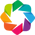

In [5]:
############################################
#INCLUDES
############################################

#geographic libraries
import geopandas as gd
from shapely.geometry import Polygon
from cartopy import crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy.io.img_tiles import GoogleTiles

import datashader as ds
import xarray as xr
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf

#bokeh maps
import bokeh as bk
#from bokeh.tile_providers import Vendors
from bokeh.models import WMTSTileSource
from bokeh.plotting import figure, show, output_file, curdoc
from bokeh.models import ColumnDataSource, ColorBar, HoverTool, Slider, CustomJS
from bokeh.palettes import Spectral6
from bokeh.transform import linear_cmap
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import column, gridplot, row

hv.extension('bokeh')
hv.notebook_extension('bokeh')

#Generally useful / common libraries
import csv
from datetime import datetime, timedelta
import fnmatch
import statistics
import pickle
import os
import subprocess
import datetime
import sys
import gc
import getopt
import inspect
import math
import warnings
from pathlib import Path

#Data Science
import numpy as np
import pandas as pd
import polars as pl
import dask as da
import xarray as xr
import scipy as sp
import scipy.ndimage

#Pretty Print
from rich import print as rprint
from icecream import ic
from tqdm.notebook import trange, tqdm
from watermark import watermark as the_watermark

#libraries specific to this example
import scipy as sp
from sklearn.linear_model import LinearRegression

#- Graphics
import matplotlib.pyplot as plt
import matplotlib as matplt
import matplotlib
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea, AnchoredText)
from matplotlib.pyplot import imshow
from matplotlib.patches import Circle
from PIL import Image as PIL_Image
import PIL.ImageOps
import seaborn as sns
import cartopy.crs as ccrs

#- Image meta-data for Section 508 compliance
import piexif
from piexif.helper import UserComment

#- Additional libraries for this work
import math
from base64 import b64decode
from IPython.display import Image, Markdown
import pandas, IPython.display as display, io, jinja2, base64
import requests
import unidecode

# for NetCDF output
import netCDF4 as nc
from netCDF4 import Dataset


## Functions

In [6]:
# Functions are like legos that do one thing, this function outputs library version history of effort.
def lib_diagnostics() -> None:

    import pkg_resources

    package_name_length=20
    package_version_length=10

    data_version_release="-".join([str(VERSION_NAME),str(VERSION_MAJOR), str(VERSION_MINOR), str(VERSION_RELEASE)])
    rprint(f"Software Version Information: {data_version_release}")
    rprint("\n")
    # Show notebook details
    #%watermark?
    #%watermark --github_username christophergwood --email christopher.g.wood@gmail.com --date --time --iso8601 --updated --python --conda --hostname --machine --githash --gitrepo --gitbranch --iversions --gpu
    # Watermark
    rprint(the_watermark(author=f"{AUTHOR_NAME}", github_username=f"GITHUB_USERNAME", email=f"{AUTHOR_EMAIL}",iso8601=True, datename=True, current_time=True, python=True, updated=True, hostname=True, machine=True, gitrepo=True, gitbranch=True, githash=True))


    print(f"{BOLD_START}Packages:{BOLD_END}")
    print("")
    # Get installed packages
    the_packages=["nltk", "numpy", "os", "pandas", "seaborn"]
    installed = {pkg.key: pkg.version for pkg in pkg_resources.working_set}
    for package_idx, package_name in enumerate(installed):
         if package_name in the_packages:
             installed_version = installed[package_name]
             rprint(f"{package_name:<40}#: {str(pkg_resources.parse_version(installed_version)):<20}")

    try:
        rprint(f"{'TensorFlow version':<40}#: {str(tf.__version__):<20}")
        rprint(f"{'     gpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('GPU')))}")
        rprint(f"{'     cpu.count:':<40}#: {str(len(tf.config.experimental.list_physical_devices('CPU')))}")
    except Exception as e:
        pass

    try:
        rprint(f"{'Torch version':<40}#: {str(torch.__version__):<20}")
        rprint(f"{'     GPUs available?':<40}#: {torch.cuda.is_available()}")
        rprint(f"{'     count':<40}#: {torch.cuda.device_count()}")
        rprint(f"{'     current':<40}#: {torch.cuda.current_device()}")
    except Exception as e:
        pass


    try:
      print(f"{'OpenAI Azure Version':<40}#: {str(the_openai_version):<20}")
    except Exception as e:
      pass

    return

In [7]:
# Routines designed to support adding ALT text to an image generated through Matplotlib.

def capture(figure):
   buffer = io.BytesIO()
   figure.savefig(buffer)
   #return F"data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}"
   return F"data:image/jpg;base64,{base64.b64encode(buffer.getvalue()).decode()}"

def make_accessible(figure, template, **kwargs):
   return display.Markdown(F"""![]({capture(figure)} "{template.render(**globals(), **kwargs)}")""")


# requires JPG's or TIFFs
def add_alt_text(image_path, alt_text):
    try:
        if os.path.isfile(image_path):
          img = PIL_Image.open(image_path)
          if "exif" in img.info:
              exif_dict = piexif.load(img.info["exif"])
          else:
              exif_dict={}

          w, h = img.size
          if "0th" not in exif_dict:
            exif_dict["0th"]={}
          exif_dict["0th"][piexif.ImageIFD.XResolution] = (w, 1)
          exif_dict["0th"][piexif.ImageIFD.YResolution] = (h, 1)

          software_version=" ".join(["STEM-001 with Python v", str(sys.version).split(" ")[0]])
          exif_dict["0th"][piexif.ImageIFD.Software]=software_version.encode("utf-8")

          if "Exif" not in exif_dict:
            exif_dict["Exif"]={}
          exif_dict["Exif"][piexif.ExifIFD.UserComment] = UserComment.dump(alt_text, encoding="unicode")

          exif_bytes = piexif.dump(exif_dict)
          img.save(image_path, "jpeg", exif=exif_bytes)
        else:
          rprint(f"Cound not fine {image_path} for ALT text modification, please check your paths.")

    except (FileExistsError, FileNotFoundError, Exception) as e:
        process_exception(e)

# Appears to solve a problem associated with GPU use on Colab, see: https://github.com/explosion/spaCy/issues/11909
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"


In [8]:
# this function displays the stack trace on errors from a central location making adjustments to the display on an error easier to manage
# functions perform useful solutions for highly repetitive code
def process_exception(inc_exception: Exception) -> None:
  try:
    if DEBUG_STACKTRACE==1:
      traceback.print_exc()
      console.print_exception(show_locals=True)
    else:
      rprint(repr(inc_exception))
  except Exception as e:
    rprint(repr(inc_exception))

In [9]:
#library configurations examples using Pandas
def setup_libary_configuration() -> None:
    options = {
        'display': {
            'max_columns': None,
            'max_colwidth': 25,
            'expand_frame_repr': False,  # Don't wrap to multiple pages
            'max_rows': 14,
            'max_seq_items': 50,         # Max length of printed sequence
            'precision': 4,
            'show_dimensions': False
        },
        'mode': {
            'chained_assignment': None   # Controls SettingWithCopyWarning
        }
    }

    for category, option in options.items():
        for op, value in option.items():
            pd.set_option(f'{category}.{op}', value)  # Python 3.6+

    #nump equivalent
    np.set_printoptions(precision=4)

## Variable declaration

In [10]:
############################################
# GLOBAL VARIABLES
############################################
DEBUG = 1
DEBUG_DATA = 1
# used to fully display the error stack, set to 1 if you want to see a ridiculous amount of debugging information
DEBUG_STACKTRACE=0

VERSION_NAME    = "GEOGRAPHY APP"
VERSION_ACRONYM = "GEOAPP"
VERSION_MAJOR   = 0
VERSION_MINOR   = 0
VERSION_RELEASE = 1
VERSION_TITLE   = VERSION_NAME + " (" + VERSION_NAME + ") " + str(VERSION_MAJOR) + "." + str(VERSION_MINOR) + "." + str(VERSION_RELEASE) + " generated SEED."


# API Parameters for things like WordCloud, variables help hold information for later use
# The "constants" represent variables that we don't anticipate changing over the course of the program.
IMG_BACKGROUND="black"     #options are black, white, another color or None
IMG_FONT_SIZE_MIN=10
IMG_WIDTH=1024
IMG_HEIGHT=768
IMG_INTERP="bilinear"
IMG_ALPHA=0.8
IMG_ASPECT="equal"
FIGURE_WIDTH=11
FIGURE_HEIGHT=8.5
WORD_FREQ=10

# specify how image formats will be saved
IMG_EXT=".jpg"

# location of our working files
WORKING_FOLDER="/content/folderOnColab"
SRC_DIR=WORKING_FOLDER

# Notebook Author details
AUTHOR_NAME="Christopher G Wood"
GITHUB_USERNAME="christophergarthwood"
AUTHOR_EMAIL="christopher.g.wood@gmail.com"

# Encoding
ENCODING  ="utf-8"
os.environ['PYTHONIOENCODING']=ENCODING

ACS_FILE="ACS.txt"
ACS_ID="12L8VRY6J1Sj-B1vIf-ODh4kjHWHqIzm8"
ACS_HEADER=["%Year","Month","Day","Hour","Minute","Second(UTC)","Longitude(deg)","Latitude(deg)","Pressure(dbar)","C400","C404.1","C407.1","C410.5","C413.9","C417.4","C421.5","C426","C430.1","C433.8","C437.9","C442.1","C446.3","C451.1","C455.7","C459.9","C464.1","C468.5","C473.3","C478","C483.1","C487.6","C491.8","C496","C500.1","C504.8","C509.5","C514.4","C519.2","C523.9","C528.2","C532.3","C536.6","C540.9","C545.4","C549.9","C554.3","C558.7","C563.2","C567.6","C571.5","C575.4","C579.3","C582.9","C587.6","C591.7","C596","C600.6","C605","C609.3","C613.9","C618.4","C622.5","C626.5","C630.9","C635","C639.3","C643.6","C647.9","C652.7","C657","C661.4","C665.9","C670.3","C674.7","C678.8","C683.2","C687.1","C690.8","C694.7","C698.9","C702.3","C706.3","C710","C714.2","C717.6","C721.4","C725.6","C729.2","C732.7","C735.9","C739.4","C743.7","A398.4","A402.1","A405.7","A408.9","A412.3","A415.8","A419.8","A424","A428.3","A432.2","A436.1","A440.3","A444.8","A449.5","A454.1","A458.3","A462.4","A466.8","A471.5","A476.4","A481.3","A486","A490.2","A494.4","A498.8","A503.1","A507.8","A512.6","A517.7","A522.5","A526.8","A531.1","A535.3","A539.7","A544.2","A548.7","A553.1","A557.5","A562.2","A566.6","A570.8","A574.6","A578.6","A582","A585.8","A589.6","A594","A598.7","A602.9","A607.6","A611.8","A616.5","A620.9","A625.2","A629.4","A633.7","A637.7","A642.1","A646.4","A650.9","A655.4","A660","A664.7","A669","A673.6","A677.8","A682","A685.9","A690","A693.7","A697.9","A701.7","A705.4","A709.2","A713.4","A717.1","A720.8","A724.6","A728.6","A732.1","A735.6","A738.9","A742.7"]
ACS_HEADER_COUNT=len(ACS_HEADER)
ACS_DOMAIN=ACS_HEADER[9:]


## Library Invocation

In [11]:
rprint("Library Diagnostics")
setup_libary_configuration()
lib_diagnostics()

Library Diagnostics

<ipython-input-6-7a98eaf52e4d>:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


Software Version Information: GEOGRAPHY APP-0-0-1

Author: Christopher G Wood

Github username: GITHUB_USERNAME

Email: christopher.g.wood@gmail.com

Last updated: 2025-02-05T23:10:56.993656+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 5.15.167+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

Hostname: 757a20244e36

Git hash: 

Git repo: 

Git branch:

Packages:



nltk                                    #: 3.9.1

numpy                                   #: 1.26.4

pandas                                  #: 2.2.2

seaborn                                 #: 0.13.2

## Data

In [12]:
target_folder=WORKING_FOLDER

target_files=[ACS_ID, ]
target_filenames=[ACS_FILE, ]

rprint(f"Creating a folder ({target_folder}) to store project data.")

try:
  if os.path.isfile(target_folder):
    raise OSError("Cannot create your folder a file of the same name already exists there, work with your instructor or remove it yourself.")
  elif os.path.isdir(target_folder):
    print(f"The folder named ({target_folder}) {BOLD_START}already exists{BOLD_END}, we won't try to create a new folder.")
  else:
    subprocess.run(["mkdir", "-p" , target_folder], check=True)
except (subprocess.CalledProcessError, Exception) as e:
  process_exception(e)

for idx, the_name in enumerate(target_files):
  try:
    rprint(f"...downloading {target_filenames[idx]}.")
    subprocess.run(["gdown", f"{the_name}", "--no-check-certificate",  "--continue", "-O", f"{target_folder}{os.sep}{target_filenames[idx]}"], check=True)
  except (subprocess.CalledProcessError, Exception) as e:
    process_exception(e)
    raise SystemError

rprint("Files downloaded:")
cmd=["ls ", "-alR", f"{target_folder}{os.sep}*",]
completed_process=subprocess.run(cmd, check=True, shell=True, capture_output=True, text=True)
if (completed_process.returncode==0):
  rprint(completed_process.stdout)
else:
  rprint(f"Command failed with error code of: {completed_process.returncode}")

Creating a folder (/content/folderOnColab) to store project data.

The folder named (/content/folderOnColab) already exists, we won't try to create a new folder.


...downloading ACS.txt.

CompletedProcess(args=['gdown', '12L8VRY6J1Sj-B1vIf-ODh4kjHWHqIzm8', '--no-check-certificate', '--continue', '-O', '/content/folderOnColab/ACS.txt'], returncode=0)

Files downloaded:

folderOnColab

## Read the ACS data file for later display

In [13]:
#read the datafile from 005

#ACS datafile characteristics
ACS_FILE="ACS.txt"
ACS_HEADER=["%Year","Month","Day","Hour","Minute","Second(UTC)","Longitude(deg)","Latitude(deg)","Pressure(dbar)","C400","C404.1","C407.1","C410.5","C413.9","C417.4","C421.5","C426","C430.1","C433.8","C437.9","C442.1","C446.3","C451.1","C455.7","C459.9","C464.1","C468.5","C473.3","C478","C483.1","C487.6","C491.8","C496","C500.1","C504.8","C509.5","C514.4","C519.2","C523.9","C528.2","C532.3","C536.6","C540.9","C545.4","C549.9","C554.3","C558.7","C563.2","C567.6","C571.5","C575.4","C579.3","C582.9","C587.6","C591.7","C596","C600.6","C605","C609.3","C613.9","C618.4","C622.5","C626.5","C630.9","C635","C639.3","C643.6","C647.9","C652.7","C657","C661.4","C665.9","C670.3","C674.7","C678.8","C683.2","C687.1","C690.8","C694.7","C698.9","C702.3","C706.3","C710","C714.2","C717.6","C721.4","C725.6","C729.2","C732.7","C735.9","C739.4","C743.7","A398.4","A402.1","A405.7","A408.9","A412.3","A415.8","A419.8","A424","A428.3","A432.2","A436.1","A440.3","A444.8","A449.5","A454.1","A458.3","A462.4","A466.8","A471.5","A476.4","A481.3","A486","A490.2","A494.4","A498.8","A503.1","A507.8","A512.6","A517.7","A522.5","A526.8","A531.1","A535.3","A539.7","A544.2","A548.7","A553.1","A557.5","A562.2","A566.6","A570.8","A574.6","A578.6","A582","A585.8","A589.6","A594","A598.7","A602.9","A607.6","A611.8","A616.5","A620.9","A625.2","A629.4","A633.7","A637.7","A642.1","A646.4","A650.9","A655.4","A660","A664.7","A669","A673.6","A677.8","A682","A685.9","A690","A693.7","A697.9","A701.7","A705.4","A709.2","A713.4","A717.1","A720.8","A724.6","A728.6","A732.1","A735.6","A738.9","A742.7"]
ACS_HEADER_COUNT=len(ACS_HEADER)
ACS_DOMAIN=ACS_HEADER[9:]

#full path using the Path lib
SRC_FILE=target_folder+os.sep+ACS_FILE

#read the file via Pandas
acs=pd.read_csv(SRC_FILE, sep="\t", index_col=False)
acs.reset_index(inplace=True)

acs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53842 entries, 0 to 53841
Columns: 176 entries, index to A742.7
dtypes: float64(175), int64(1)
memory usage: 72.3 MB


## GeoPandas

In [14]:
#create a function for dynamic Polygon creation
def get_polygon(df, offset):
    #find the geographic boundaries of the total dataset
    bounds_df = df.bounds
    nlat = bounds_df['maxy'].max() + offset
    slat = bounds_df['miny'].max() - offset
    elon = bounds_df['maxx'].max() + offset
    wlon = bounds_df['minx'].max() - offset
    #report those boundaries
    rprint("------------------------ COORDINATES ------------------------")
    rprint("  Northern Latitude:{:8.4f}".format(nlat))
    rprint("  Southern Latitude:{:8.4f}".format(slat))
    rprint(" Northern Longitude:{:8.4f}".format(wlon))
    rprint(" Northern Longitude:{:8.4f}".format(elon))
    rprint(" Polygon( [ ({:8.4f},{:8.4f}), ({:8.4f},{:8.4f}), ({:8.4f},{:8.4f}), ({:8.4f},{:8.4f}), ({:8.4f},{:8.4f}) ])".format(wlon,nlat,wlon,slat,elon,slat,elon,nlat,wlon,nlat))

    #create a polygon for highlighting the data
    #polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
    polygon = Polygon([ (wlon,nlat), (wlon,slat), (elon,slat), (elon,nlat), (wlon,nlat) ])
    #poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)
    poly_gdf = gd.GeoDataFrame([1], geometry=[polygon], crs=df.crs)

    return poly_gdf

## Taking a detour

Geopandas no longer supports default cultural themes.  You have to download them yourself.

**References:**

+ https://www.naturalearthdata.com/

## Use GeoPandas with those downloaded layers to make some plots

In [29]:
# Display the output in different maps

highlight_box='red'
highlight_color='blue'
color_map='Spectral'
focus_area='India'
offset=5                    #degrees
show_plot=1
target_column="C400"

#rename the latitude(deg) and Longitude(deg) columns to work with GeoPandas expectations
new_acs=acs.rename(columns={"Longitude(deg)" : "Longitude", "Latitude(deg)" : "Latitude"})

#GeoDataFrame needs a shapely object. We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects and set it as a geometry while creating the GeoDataFrame.
gdf = gd.GeoDataFrame(new_acs, geometry=gd.points_from_xy(new_acs.Longitude, new_acs.Latitude))

#let's make the coordinate system explicit, normally you don't have to if showing data quickly
gdf.crs = "EPSG:3857"

#create a polygon to "bound" the data graphically
poly_gdf=get_polygon(gdf, offset)

#load the world
#world = gd.read_file(target_folder+os.sep+"ne_10m_admin_0_countries.zip")
#url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
url="https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_land.geojson"
world = gd.read_file(url)

#How did we know to the "name" India for the world dataset
#let's see the "domain" of values for world
#pd.set_option('display.max_rows', None)
#world

#setup a multiplot layout
if (show_plot):
    #create the image in the background and render with 508 compliance taken into account
    # Use the 'Agg' backend for non-interactive environments
    matplt.use('Agg')
    fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(nrows=2, ncols=2, figsize=(20,16));
    bb=fig.suptitle('ACS Flow-thru Ship Track');

    ############################################
    # AX1, Upper left
    ############################################
    #plot the world first
    ax1= world.plot(ax=ax1)
    ax1.set_title("World");
    gdf.plot(ax=ax1, color=highlight_color)
    poly_gdf.boundary.plot(ax=ax1, color=highlight_box)
    #Add a tiled image in the background, requires a download and increases time
    #ctx.add_basemap(ax1, url=ctx.providers.Stamen.TonerLite)

    ############################################
    # AX2, Upper right
    ############################################
    ax2.set_title("Indian Ocean");
    boundary=[68.1766451354, 7.96553477623, 97.4025614766, 35.4940095078]
    xlim = ([boundary[0]-increased_offset,  boundary[2]+increased_offset])
    ylim = ([boundary[1]-increased_offset,  boundary[3]+increased_offset])
    ax2.set_xlim(xlim)
    ax2.set_ylim(ylim)
    ax2 = world.plot(ax=ax2)
    gdf.plot(ax=ax2, color=highlight_color)
    poly_gdf.boundary.plot(ax=ax2,color=highlight_box)
    #Add a tiled image in the background, requires a download and increases time
    #ctx.add_basemap(ax2, url=ctx.providers.Stamen.TonerLite)

    ############################################
    # AX3, lower left
    ############################################
    ax3.set_title("Increased Zoom");
    #ax3 = gdf.to_crs(epsg=3857).plot(ax=ax3)
    #ctx.add_basemap(ax3, url=ctx.providers.Stamen.TonerLite)
    #grab the world map
    #ax3 = world[world.name == focus_area].plot(ax=ax3)
    ax3 = world.plot(ax=ax3)
    #increase the boundary of the image
    increased_offset=2
    xlim = ([poly_gdf.total_bounds[0]-increased_offset,  poly_gdf.total_bounds[2]+increased_offset])
    ylim = ([poly_gdf.total_bounds[1]-increased_offset,  poly_gdf.total_bounds[3]+increased_offset])
    ax3.set_xlim(xlim)
    ax3.set_ylim(ylim)
    #show the data
    gdf.plot(ax=ax3, color=highlight_color)
    #shrink the polygon
    poly_gdf=get_polygon(gdf, increased_offset)
    poly_gdf.boundary.plot(ax=ax3,color=highlight_box)

    ############################################
    # AX4, lower right
    ############################################
    ax4.set_title("Maximum Zoom");
    #show the data, pick the size, colormap and column that you want to show
    gdf.plot(ax=ax4, markersize=10, alpha=0.5, cmap=color_map, column=target_column)



    # Save the plot to a file that can be pulled up at a later date.
    target_filename=target_folder+os.sep+f"008_geopandas{IMG_EXT}";

    # Create ALT text describing the image.
    caption_text=f"Geospatial plot of area to the southeast of India from data gathered in the datafile.  Four plots showing increasing levels of granularity in the map (zoom), saving results to {target_filename}.";

    #Save
    plt.savefig(target_filename);
    add_alt_text(target_folder+os.sep+f"008_geopandas{IMG_EXT}", caption_text);
    rprint("Next display is a " + caption_text);


------------------------ COORDINATES ------------------------

Northern Latitude: 11.3915

Southern Latitude:  1.3915

Northern Longitude: 77.5045

Northern Longitude: 87.5045

Polygon( [ ( 77.5045, 11.3915), ( 77.5045,  1.3915), ( 87.5045,  1.3915), ( 87.5045, 11.3915), ( 77.5045, 11.3915)
])

Text(0.5, 1.0, 'World')

<Axes: title={'center': 'World'}>

<Axes: title={'center': 'World'}>

Text(0.5, 1.0, 'Indian Ocean')

(58.176645135399994, 107.4025614766)

(-2.03446522377, 45.4940095078)

<Axes: title={'center': 'Indian Ocean'}>

<Axes: title={'center': 'Indian Ocean'}>

Text(0.5, 1.0, 'Increased Zoom')

(75.504522, 89.504522)

(-0.6085288000000002, 13.3914712)

<Axes: title={'center': 'Increased Zoom'}>

------------------------ COORDINATES ------------------------

Northern Latitude:  8.3915

Southern Latitude:  4.3915

Northern Longitude: 80.5045

Northern Longitude: 84.5045

Polygon( [ ( 80.5045,  8.3915), ( 80.5045,  4.3915), ( 84.5045,  4.3915), ( 84.5045,  8.3915), ( 80.5045,  8.3915)
])

<Axes: title={'center': 'Increased Zoom'}>

Text(0.5, 1.0, 'Maximum Zoom')

<Axes: title={'center': 'Maximum Zoom'}>

Next display is a Geospatial plot of area to the southeast of India from data gathered in the datafile.  Four plots
showing increasing levels of granularity in the map (zoom), saving results to 
/content/folderOnColab/008_geopandas.jpg.

![](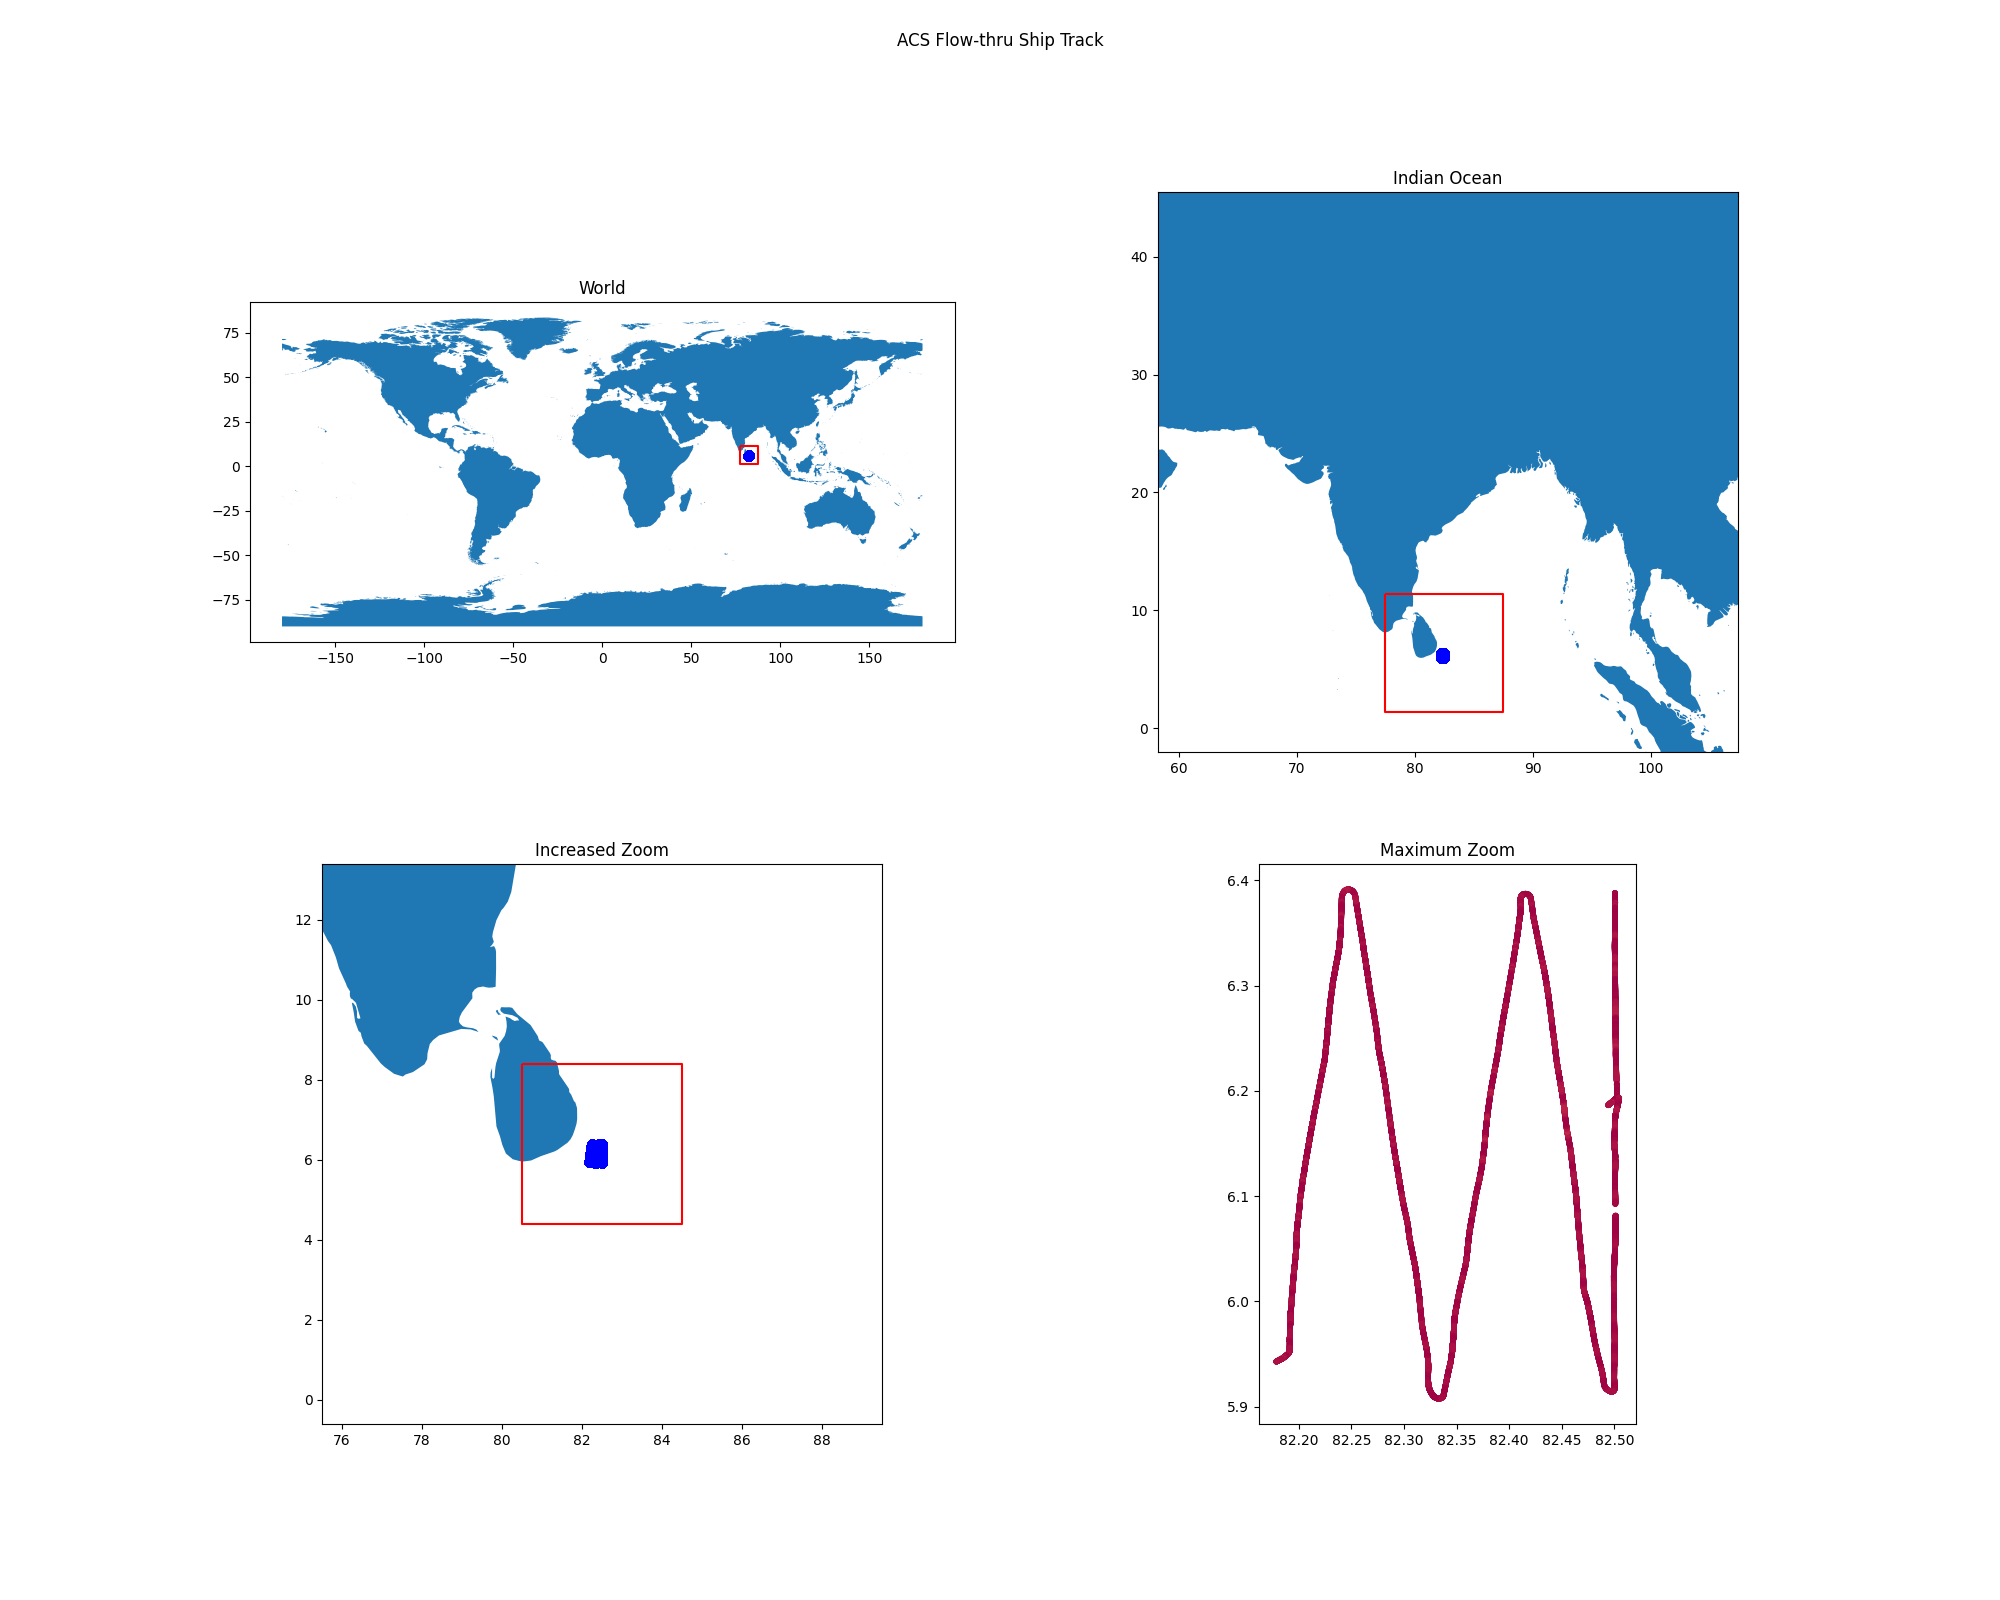 "Geospatial plot of area to the southeast of India from data gathered in the datafile.  Four plots showing increasing levels of granularity in the map (zoom), saving results to /content/folderOnColab/008_geopandas.jpg.")

Geospatial plot of area to the southeast of India from data gathered in the datafile.  Four plots showing 
increasing levels of granularity in the map (zoom), saving results to /content/folderOnColab/008_geopandas.jpg.

In [30]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

# Cartopy

Cartopy also handles Shapely objects well, but it uses a different system for CRS. To plot this data with CartoPy, we’ll first need to project it into a new CRS. We’ll use a CRS defined within CartoPy and use the GeoPandas to_crs method to make the transformation.

In [17]:
#let's define some basic variables
highlight_box='red'
highlight_color='blue'
color_map='Spectral'
focus_area='India'
offset=5                    #degrees
show_plot=1
target_column="C400"

#labeling
# Add a text annotation for the license information to the bottom right corner.
font_size=8
SOURCE = 'Natural Earth'
LICENSE = 'public domain'
text = AnchoredText(r'{}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': font_size}, frameon=True)


######### IMPORTANT -> we still have new_acs, no need to re-read it or forget about it.  No magic here.

#GeoDataFrame needs a shapely object. We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects and set it as a geometry while creating the GeoDataFrame.
gdf = gd.GeoDataFrame(new_acs, geometry=gd.points_from_xy(new_acs.Longitude, new_acs.Latitude))
#let's make the coordinate system explicit, normally you don't have to if showing data quickly
gdf.crs = "EPSG:3857"

#create a polygon to "bound" the data graphically
poly_gdf=get_polygon(gdf, offset)

#setup a multiplot layout
if (show_plot):

    fig1=plt.figure(figsize=(20,16))
    bb=fig1.suptitle('ACS Flow-thru Ship Track');

    ############################################
    # Whole world
    ############################################
    #plot the world first
    ax1=fig1.add_subplot(2,2,1, projection=ccrs.PlateCarree())
    bb=ax1.set_title("World");
    bb=ax1.set_extent([world.total_bounds[0], world.total_bounds[2], world.total_bounds[1], world.total_bounds[3]], crs=ccrs.PlateCarree());
    # Put a background image on for nice sea rendering.
    bb=ax1.stock_img();
    bb=ax1.add_feature(cfeature.OCEAN);
    bb=ax1.add_feature(cfeature.COASTLINE);
    bb=ax1.add_feature(cfeature.BORDERS, linestyle=':');
    bb=ax1.add_feature(cfeature.LAKES, alpha=0.5);
    bb=ax1.add_feature(cfeature.RIVERS);
    bb=ax1.add_artist(text);

    bb=gdf.plot(ax=ax1, color=highlight_color);
    bb=poly_gdf.boundary.plot(ax=ax1, color=highlight_box);

    ############################################
    # AX2, Upper right
    ############################################

    ax2=fig1.add_subplot(2,2,2, projection=ccrs.PlateCarree());
    bb=ax2.set_title("Indian Ocean");

    increased_offset=5
    #Western Longitude,
    #'India', (68.1766451354, 7.96553477623, 97.4025614766, 35.4940095078)),
    boundary=[68.1766451354, 7.96553477623, 97.4025614766, 35.4940095078]
    bb=ax2.set_extent(boundary, crs=ccrs.PlateCarree());
    xlim = ([boundary[0]-increased_offset,  boundary[2]+increased_offset])
    ylim = ([boundary[1]-increased_offset,  boundary[3]+increased_offset])
    bb=ax2.set_xlim(xlim);
    bb=ax2.set_ylim(ylim);
    bb=ax2.stock_img();
    bb=ax2.coastlines('10m');
    bb=ax2.add_feature(cfeature.LAND);
    bb=ax2.add_feature(cfeature.OCEAN);
    bb=ax2.add_feature(cfeature.COASTLINE);
    bb=ax2.add_feature(cfeature.BORDERS, linestyle=':');
    bb=ax2.add_feature(cfeature.LAKES, alpha=0.5);
    bb=ax2.add_feature(cfeature.RIVERS);

    bb=gdf.plot(ax=ax2, color=highlight_color);
    bb=poly_gdf.boundary.plot(ax=ax2, color=highlight_box);


    ############################################
    # AX3, lower left
    ############################################
    ax3=fig1.add_subplot(2,2,3, projection=ccrs.PlateCarree());
    bb=ax3.set_title("Increased Zoom");
    #define the boundary
    boundary=gdf #actual data
    #increase the boundary of the image
    increased_offset=2.5
    bb=ax3.set_extent([boundary.total_bounds[0]-increased_offset, boundary.total_bounds[2]+increased_offset, boundary.total_bounds[1]-increased_offset, boundary.total_bounds[3]+increased_offset], crs=ccrs.PlateCarree());
    xlim = ([boundary.total_bounds[0]-increased_offset,  boundary.total_bounds[2]+increased_offset])
    ylim = ([boundary.total_bounds[1]-increased_offset,  boundary.total_bounds[3]+increased_offset])
    bb=ax3.set_xlim(xlim);
    bb=ax3.set_ylim(ylim);

    bb=ax3.stock_img();
    bb=ax3.add_feature(cfeature.LAND);
    bb=ax3.add_feature(cfeature.COASTLINE);
    bb=ax3.coastlines('10m');

    bb=gdf.plot(ax=ax3, color=highlight_color);
    bb=poly_gdf=get_polygon(gdf, 1);
    bb=poly_gdf.boundary.plot(ax=ax3,color=highlight_box);

    ############################################
    # AX4, lower right
    ############################################
    ax4=fig1.add_subplot(2,2,4, projection=ccrs.PlateCarree());
    bb=ax4.set_title("Maximum Zoom");
    #define the boundary
    boundary=gdf #actual data
    #increase the boundary of the image
    increased_offset=.1
    bb=ax4.set_extent([boundary.total_bounds[0]-increased_offset, boundary.total_bounds[2]+increased_offset, boundary.total_bounds[1]-increased_offset, boundary.total_bounds[3]+increased_offset], crs=ccrs.PlateCarree());
    xlim = ([boundary.total_bounds[0]-increased_offset,  boundary.total_bounds[2]+increased_offset])
    ylim = ([boundary.total_bounds[1]-increased_offset,  boundary.total_bounds[3]+increased_offset])
    bb=ax4.set_xlim(xlim);
    bb=ax4.set_ylim(ylim);

    bb=ax4.stock_img();
    bb=ax4.add_feature(cfeature.LAND);
    bb=ax4.add_feature(cfeature.COASTLINE);
    #show the data, pick the size, colormap and column that you want to show
    bb=gdf.plot(ax=ax4, markersize=10, alpha=0.5, cmap=color_map, column=target_column);

   # Save the plot to a file that can be pulled up at a later date.
    target_filename=target_folder+os.sep+f"008_geopandas2{IMG_EXT}";

    # Create ALT text describing the image.
    caption_text=f"Geospatial plot of area to the southeast of India from data gathered in the datafile.  Four plots showing increasing levels of granularity in the map (zoom), saving results to {target_filename}.";

    #Save
    plt.savefig(target_filename);
    add_alt_text(target_folder+os.sep+f"008_geopandas2{IMG_EXT}", caption_text);
    rprint("Next display is a " + caption_text);




------------------------ COORDINATES ------------------------

Northern Latitude: 11.3915

Southern Latitude:  1.3915

Northern Longitude: 77.5045

Northern Longitude: 87.5045

Polygon( [ ( 77.5045, 11.3915), ( 77.5045,  1.3915), ( 87.5045,  1.3915), ( 87.5045, 11.3915), ( 77.5045, 11.3915)
])

------------------------ COORDINATES ------------------------

Northern Latitude:  7.3915

Southern Latitude:  5.3915

Northern Longitude: 81.5045

Northern Longitude: 83.5045

Polygon( [ ( 81.5045,  7.3915), ( 81.5045,  5.3915), ( 83.5045,  5.3915), ( 83.5045,  7.3915), ( 81.5045,  7.3915)
])

Next display is a Geospatial plot of area to the southeast of India from data gathered in the datafile.  Four plots
showing increasing levels of granularity in the map (zoom), saving results to 
/content/folderOnColab/008_geopandas2.jpg.

![](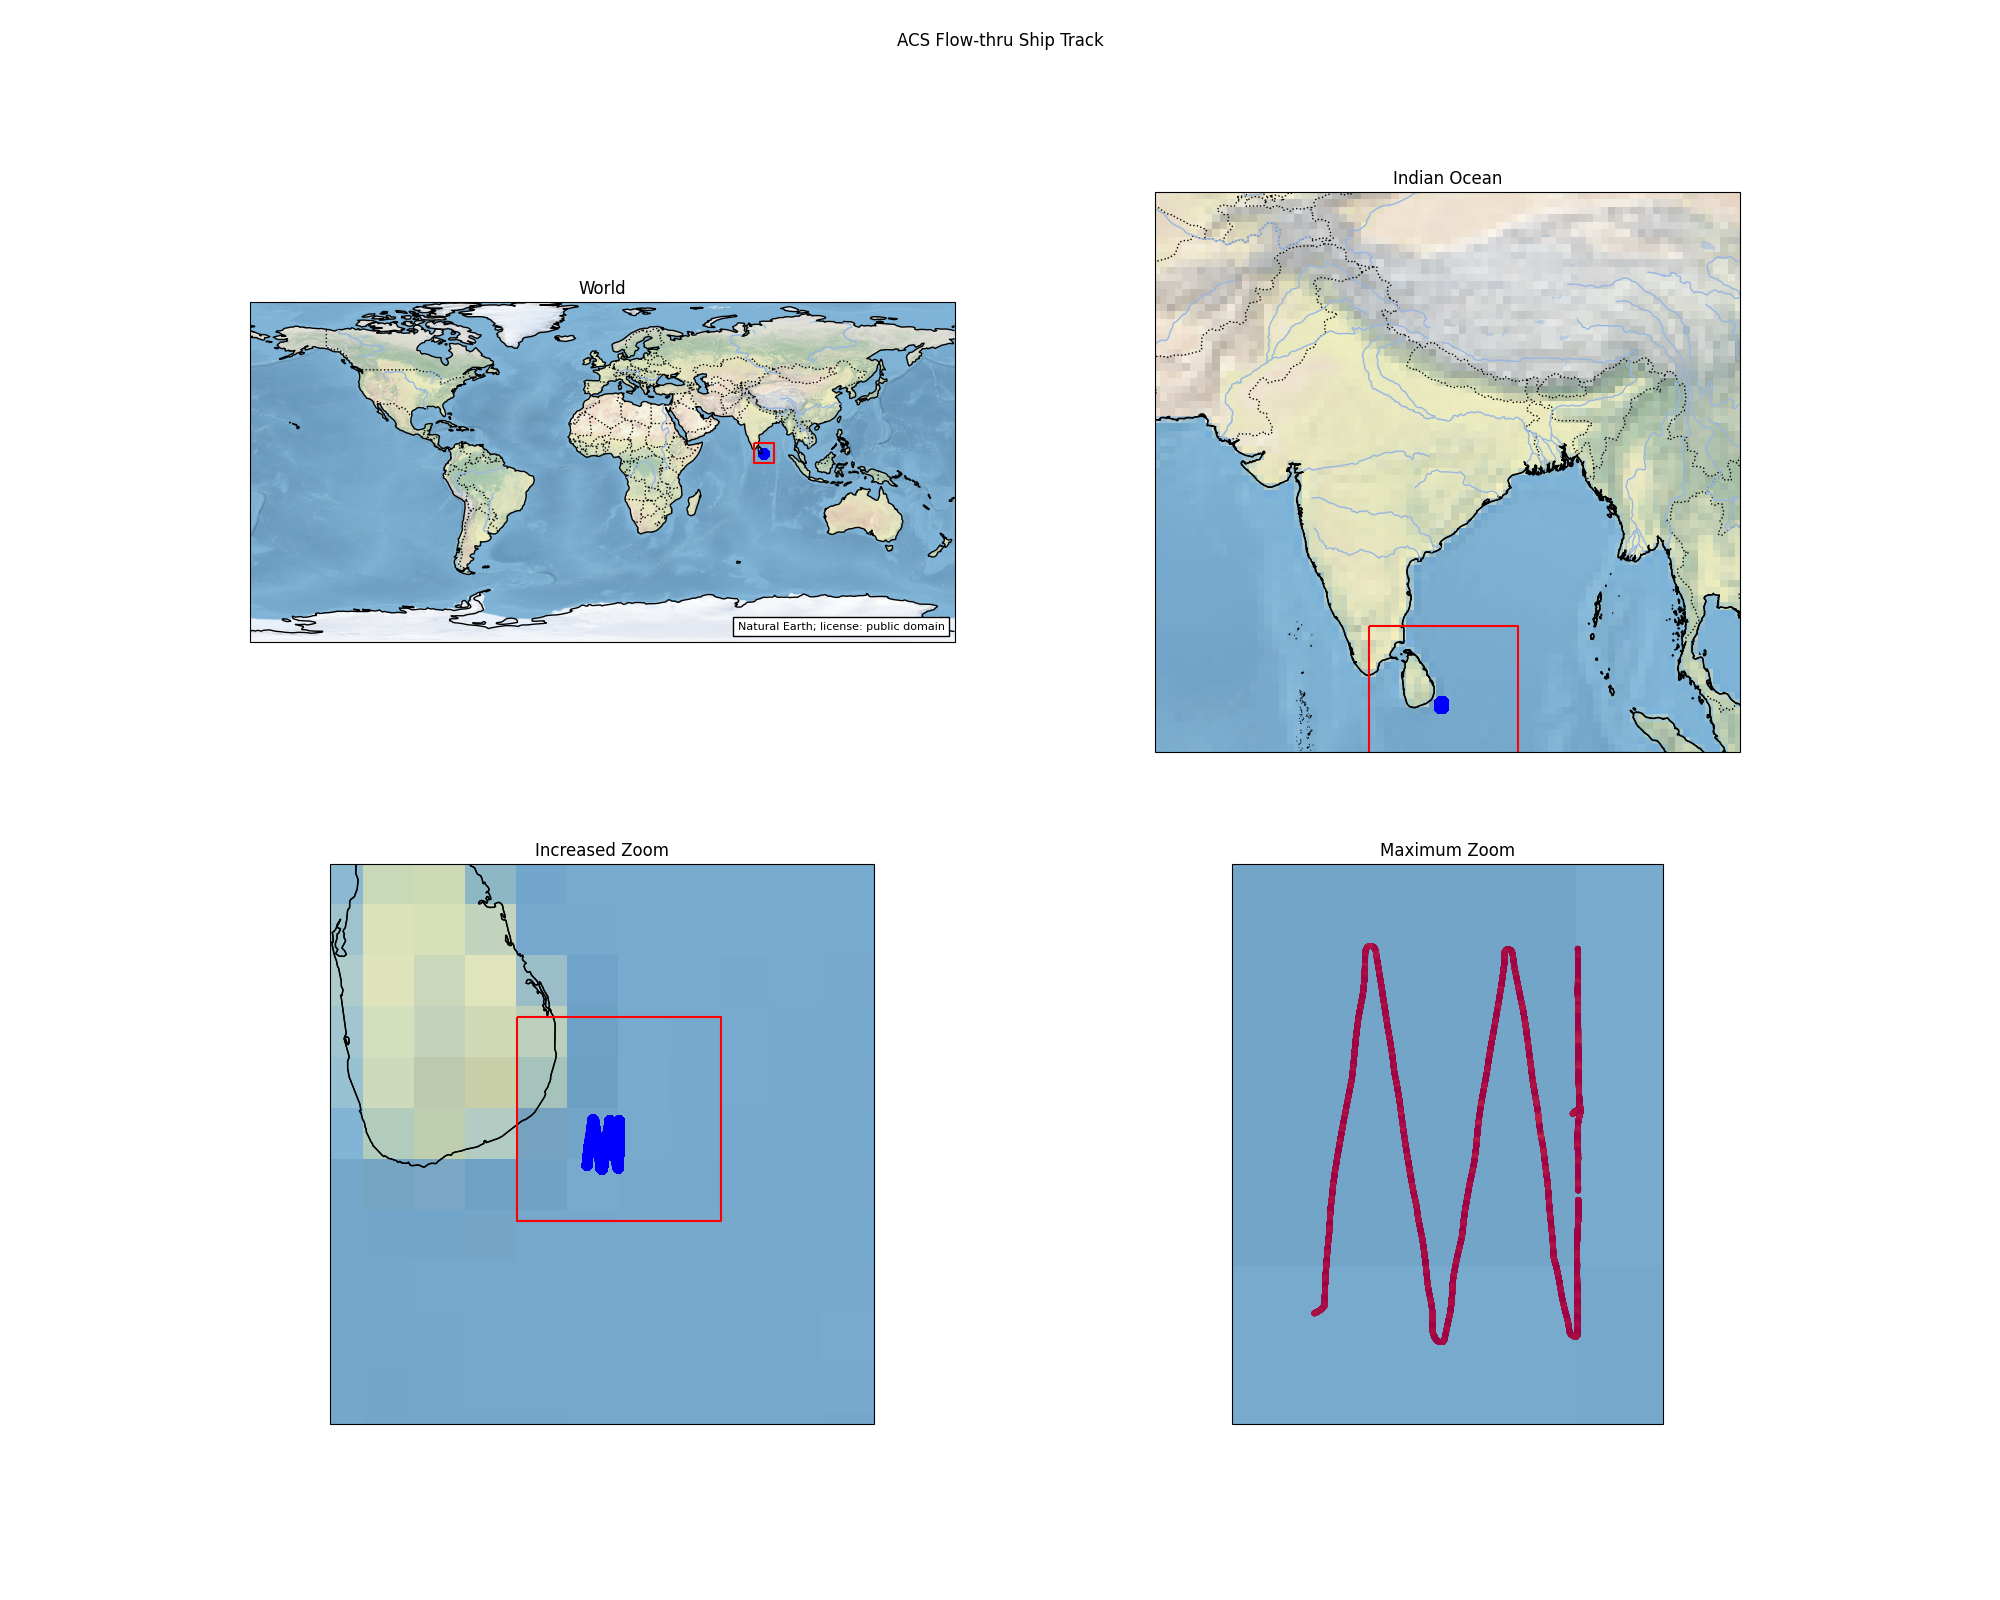 "Geospatial plot of area to the southeast of India from data gathered in the datafile.  Four plots showing increasing levels of granularity in the map (zoom), saving results to /content/folderOnColab/008_geopandas2.jpg.")

Geospatial plot of area to the southeast of India from data gathered in the datafile.  Four plots showing 
increasing levels of granularity in the map (zoom), saving results to /content/folderOnColab/008_geopandas2.jpg.

In [18]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

## Cartopy with Tiles

In [19]:
#let's define some basic variables
highlight_box='red'
highlight_color='blue'
color_map='Spectral'
focus_area='India'
offset=5                    #degrees
show_plot=1
target_column="C400"

# data setup
new_acs=acs.rename(columns={"Longitude(deg)" : "Longitude", "Latitude(deg)" : "Latitude"})

#labeling
# Add a text annotation for the license information to the bottom right corner.
font_size=8
SOURCE = 'Natural Earth'
LICENSE = 'public domain'
text = AnchoredText(r'$\mathcircled{{c}}$ {}; license: {}'
                    ''.format(SOURCE, LICENSE),
                    loc=4, prop={'size': font_size}, frameon=True)


######### IMPORTANT -> we still have new_acs, no need to re-read it or forget about it.  No magic here.

#GeoDataFrame needs a shapely object. We use geopandas points_from_xy() to transform Longitude and Latitude into a list of shapely.Point objects and set it as a geometry while creating the GeoDataFrame.
gdf = gd.GeoDataFrame(new_acs, geometry=gd.points_from_xy(new_acs.Longitude, new_acs.Latitude))
#let's make the coordinate system explicit, normally you don't have to if showing data quickly
gdf.crs = "EPSG:3857"

#create a polygon to "bound" the data graphically
poly_gdf=get_polygon(gdf, offset)

#setup a multiplot layout
if (show_plot):
    #create the image in the background and render with 508 compliance taken into account
    # Use the 'Agg' backend for non-interactive environments
    matplt.use('Agg')

    fig1=plt.figure(figsize=(FIGURE_WIDTH,FIGURE_HEIGHT));
    bb=fig1.suptitle('ACS Flow-thru Ship Track');

    ############################################
    # AX2, Upper right
    ############################################
    from cartopy.io.img_tiles import Stamen
    #tiler=Stamen('terrain-background');
    tiler = GoogleTiles(style="satellite");
    mercator = tiler.crs;

    ax2=fig1.add_subplot(1,1,1, projection=ccrs.PlateCarree());
    bb=ax2.set_title("Indian Ocean");

    increased_offset=10
    boundary=gdf
    #Western Longitude,
    bb=ax2.set_extent([boundary.total_bounds[0]-increased_offset, boundary.total_bounds[2]+increased_offset, boundary.total_bounds[1]-increased_offset, boundary.total_bounds[3]+increased_offset], crs=ccrs.PlateCarree())
    xlim = ([boundary.total_bounds[0]-increased_offset,  boundary.total_bounds[2]+increased_offset])
    ylim = ([boundary.total_bounds[1]-increased_offset,  boundary.total_bounds[3]+increased_offset])
    bb=ax2.set_xlim(xlim);
    bb=ax2.set_ylim(ylim);
    #6 = terrain, it's in the example, no idea
    bb=ax2.add_image(tiler,6);
    bb=ax2.coastlines('10m');
    bb=ax2.add_feature(cfeature.LAND);
    bb=ax2.add_feature(cfeature.OCEAN);
    bb=ax2.add_feature(cfeature.COASTLINE);
    bb=ax2.add_feature(cfeature.BORDERS, linestyle=':');
    bb=ax2.add_feature(cfeature.LAKES, alpha=0.5);
    bb=ax2.add_feature(cfeature.RIVERS);

    bb=gdf.plot(ax=ax2, color=highlight_color);
    bb=poly_gdf=get_polygon(gdf, 1);
    bb=poly_gdf.boundary.plot(ax=ax2, color=highlight_box);

    # Save the plot to a file that can be pulled up at a later date.
    target_filename=target_folder+os.sep+f"008_cartopy_tiled{IMG_EXT}";

    # Create ALT text describing the image.
    caption_text=f"Geospatial plot of area to the southeast of India from data gathered in teh datafile, saving results to {target_filename}.";

    #Save
    plt.savefig(target_filename);
    add_alt_text(target_folder+os.sep+f"008_cartopy_tiled{IMG_EXT}", caption_text);
    rprint("Next display is a " + caption_text);

------------------------ COORDINATES ------------------------

Northern Latitude: 11.3915

Southern Latitude:  1.3915

Northern Longitude: 77.5045

Northern Longitude: 87.5045

Polygon( [ ( 77.5045, 11.3915), ( 77.5045,  1.3915), ( 87.5045,  1.3915), ( 87.5045, 11.3915), ( 77.5045, 11.3915)
])

------------------------ COORDINATES ------------------------

Northern Latitude:  7.3915

Southern Latitude:  5.3915

Northern Longitude: 81.5045

Northern Longitude: 83.5045

Polygon( [ ( 81.5045,  7.3915), ( 81.5045,  5.3915), ( 83.5045,  5.3915), ( 83.5045,  7.3915), ( 81.5045,  7.3915)
])

Next display is a Geospatial plot of area to the southeast of India from data gathered in teh datafile, saving 
results to /content/folderOnColab/008_cartopy_tiled.jpg.

![](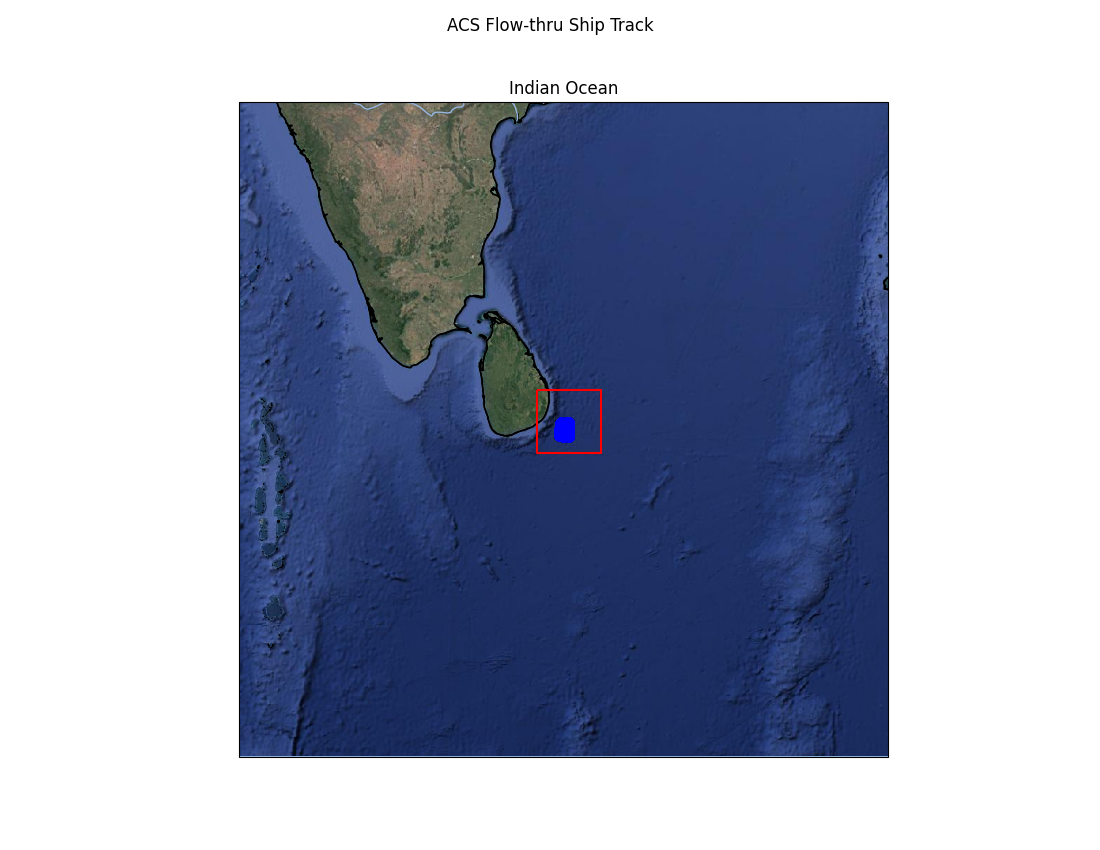 "Geospatial plot of area to the southeast of India from data gathered in teh datafile, saving results to /content/folderOnColab/008_cartopy_tiled.jpg.")

Geospatial plot of area to the southeast of India from data gathered in teh datafile, saving results to 
/content/folderOnColab/008_cartopy_tiled.jpg.

In [20]:
# Display Section 508 compliant image on the scrren with ALT text
try:
  make_accessible(plt, jinja2.Template(caption_text), len=len)
  rprint("\n")
  rprint(caption_text)
except (NameError, Exception) as e:
  process_exception(e)

## Holoviews



The Applying Customizations user guide describes the currently recommended way to customize your visualizations in HoloViews. Those mechanisms use standard Python syntax but they are not the only way to apply options as there is a much older approach for working with HoloViews that is specific to notebooks.

From the start, HoloViews aimed to enable rapid exploration of data in Jupyter Notebooks. For this reason, when you load the HoloViews extension in a notebook, you also get a set of IPython magics. IPython magics use a syntax that is not standard Python and the HoloViews magics only apply in the notebook environment (and not the IPython terminal for instance).

The advantages of the notebook magics are:

    They allow tab-completion in the notebook environment (but so do the more recent option builders and hv.output mechanisms).
    They allow very concise expression of options and settings.

Unfortunately, they also have some serious disadvantages:

    They are not Python syntax which makes it difficult to use code written with magics in notebooks anywhere else. For instance, it makes it harder to use such code with bokeh server or panel.
    They have their own special syntax which is very concise but also rather mysterious.

These disadvantages means the magics can be bewildering to anyone unfamiliar with the IPython specific syntax and HoloViews itself, and are no longer recommended for these reasons. This user guide documents these magics to allow people to understand older notebooks using HoloViews and to help people update these old notebooks to use the recommended Python API.
Line and cell magics

There are two types of magic supported in Jupyter notebooks called line magics and cell magics respectively. Both typically appear at the top of code cells prefixed by % (line magics) or %% (cell magics).

    line magics: These can appear anywhere in a code cell and effect global changes to the current notebook session. HoloViews has the %opts and %output line magics.
    cell magics: These have to appear at the top of the cell and are used to modify how that cell is executed. HoloViews has the %%opts and %%ouput cell magics.

The %opts and %%opts magics

These two magics are now served by opts.defaults and the .opts method respectively, as described in the Applying Customizations user guide.

    The %opts line magic: IPython specific syntax applied globally [string format]
    The %%opts cell magic: IPython specific syntax applies to displayed object [string format]


In [21]:
tiles = {'OpenMap': WMTSTileSource(url='http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'),
         'ESRI': WMTSTileSource(url='https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'),
        }

## Example Tile Sets

In [22]:
%%opts WMTS [width=800 height=600 xaxis=None yaxis=None]
hv.NdLayout({name: gv.WMTS(wmts, extents=(xlim[0], ylim[0], xlim[1], ylim[1]), crs=ccrs.PlateCarree())
            for name, wmts in tiles.items()}, kdims=['Source']).cols(2)

:NdLayout   [Source]
   :WMTS   [Longitude,Latitude]

## Holoview + Bokeh Plot of ACS Flo-thru data

Notice the menu on the right side, this allows for interactive map manipulation along with hover over of data values.

**References:**

+ https://holoviews.org/
+ http://bokeh.org/

In [23]:
%%opts WMTS [width=800 height=600 xaxis=None yaxis=None]
%%opts Overlay [width=800 height=600]
%%opts Points (size=3 cmap='viridis') [tools=['hover'] xaxis=None yaxis=None]

#reusing the new_acs dataset but removing a LOT of data to help with render, keeping C400
del_columns=["Year","Month","Day","Hour","Minute","Second(UTC)","Pressure(dbar)","C404.1","C407.1","C410.5","C413.9","C417.4","C421.5","C426","C430.1","C433.8","C437.9","C442.1","C446.3","C451.1","C455.7","C459.9","C464.1","C468.5","C473.3","C478","C483.1","C487.6","C491.8","C496","C500.1","C504.8","C509.5","C514.4","C519.2","C523.9","C528.2","C532.3","C536.6","C540.9","C545.4","C549.9","C554.3","C558.7","C563.2","C567.6","C571.5","C575.4","C579.3","C582.9","C587.6","C591.7","C596","C600.6","C605","C609.3","C613.9","C618.4","C622.5","C626.5","C630.9","C635","C639.3","C643.6","C647.9","C652.7","C657","C661.4","C665.9","C670.3","C674.7","C678.8","C683.2","C687.1","C690.8","C694.7","C698.9","C702.3","C706.3","C710","C714.2","C717.6","C721.4","C725.6","C729.2","C732.7","C735.9","C739.4","C743.7","A398.4","A402.1","A405.7","A408.9","A412.3","A415.8","A419.8","A424","A428.3","A432.2","A436.1","A440.3","A444.8","A449.5","A454.1","A458.3","A462.4","A466.8","A471.5","A476.4","A481.3","A486","A490.2","A494.4","A498.8","A503.1","A507.8","A512.6","A517.7","A522.5","A526.8","A531.1","A535.3","A539.7","A544.2","A548.7","A553.1","A557.5","A562.2","A566.6","A570.8","A574.6","A578.6","A582","A585.8","A589.6","A594","A598.7","A602.9","A607.6","A611.8","A616.5","A620.9","A625.2","A629.4","A633.7","A637.7","A642.1","A646.4","A650.9","A655.4","A660","A664.7","A669","A673.6","A677.8","A682","A685.9","A690","A693.7","A697.9","A701.7","A705.4","A709.2","A713.4","A717.1","A720.8","A724.6","A728.6","A732.1","A735.6","A738.9","A742.7"]
df=new_acs.drop(columns=del_columns)

optics = gv.Dataset(df, kdims=['C400'])


(gv.WMTS(tiles['ESRI']) * optics.to(gv.Points, kdims=['Longitude', 'Latitude'],vdims=['C400'], crs=ccrs.PlateCarree(), extents=(xlim[0], ylim[0], xlim[1], ylim[1]),))

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (C400)

## Bokeh

Bokeh is an interactive visualization library for modern web browsers. It provides elegant, concise construction of versatile graphics, and affords high-performance interactivity over large or streaming datasets. Bokeh can help anyone who would like to quickly and easily make interactive plots, dashboards, and data applications.

**References:**

+ http://bokeh.org/

In [24]:
#function definition for converting degrees to units JS can handle
import math

# derived from the Java version explained here: http://wiki.openstreetmap.org/wiki/Mercator
RADIUS = 6378137.0 # in meters on the equator

def lat2y(x):
  return math.log(math.tan(math.pi / 4 + math.radians(x) / 2)) * RADIUS

def lon2x(x):
  return math.radians(x) * RADIUS

In [25]:
#Prep the data
#reusing the new_acs dataset but removing a LOT of data to help with render, keeping C400
del_columns=["Year","Month","Day","Hour","Minute","Second(UTC)","Pressure(dbar)","C404.1","C407.1","C410.5","C413.9","C417.4","C421.5","C426","C430.1","C433.8","C437.9","C442.1","C446.3","C451.1","C455.7","C459.9","C464.1","C468.5","C473.3","C478","C483.1","C487.6","C491.8","C496","C500.1","C504.8","C509.5","C514.4","C519.2","C523.9","C528.2","C532.3","C536.6","C540.9","C545.4","C549.9","C554.3","C558.7","C563.2","C567.6","C571.5","C575.4","C579.3","C582.9","C587.6","C591.7","C596","C600.6","C605","C609.3","C613.9","C618.4","C622.5","C626.5","C630.9","C635","C639.3","C643.6","C647.9","C652.7","C657","C661.4","C665.9","C670.3","C674.7","C678.8","C683.2","C687.1","C690.8","C694.7","C698.9","C702.3","C706.3","C710","C714.2","C717.6","C721.4","C725.6","C729.2","C732.7","C735.9","C739.4","C743.7","A398.4","A402.1","A405.7","A408.9","A412.3","A415.8","A419.8","A424","A428.3","A432.2","A436.1","A440.3","A444.8","A449.5","A454.1","A458.3","A462.4","A466.8","A471.5","A476.4","A481.3","A486","A490.2","A494.4","A498.8","A503.1","A507.8","A512.6","A517.7","A522.5","A526.8","A531.1","A535.3","A539.7","A544.2","A548.7","A553.1","A557.5","A562.2","A566.6","A570.8","A574.6","A578.6","A582","A585.8","A589.6","A594","A598.7","A602.9","A607.6","A611.8","A616.5","A620.9","A625.2","A629.4","A633.7","A637.7","A642.1","A646.4","A650.9","A655.4","A660","A664.7","A669","A673.6","A677.8","A682","A685.9","A690","A693.7","A697.9","A701.7","A705.4","A709.2","A713.4","A717.1","A720.8","A724.6","A728.6","A732.1","A735.6","A738.9","A742.7"]
df=new_acs.drop(columns=del_columns)

#rename to shortest names and make generic
lat_nm="lat"
lon_nm="lon"
var_nm="obs"
df=df.rename(columns={"Latitude":"lat", "Longitude":"lon", "C400":"obs"})

In [26]:
#transform the web mercator projection using function call above
WMP=pd.DataFrame();
WMP[lon_nm]=df[lon_nm].apply(lon2x)
WMP[lat_nm]=df[lat_nm].apply(lat2y)
WMP[var_nm]=df[var_nm]

x = WMP[lon_nm].values
y = WMP[lat_nm].values
o = WMP[var_nm].values

lat_real=df[lat_nm].values
lon_real=df[lon_nm].values

In [27]:
##################################################################################
#Call bokeh routines to create an interactive HTML based map
##################################################################################

##################################################################################
#Bokeh has "tools" used to support the interactive nature of the map, the list below is the tool domain that can be invoked.
#    TOOLS="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
##################################################################################
TOOLS="pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,lasso_select,"

##################################################################################
#Source maps (builtin) allow you to relate values to coordinates seen on screen.
#Direct JS manipulation for pop-ups.
##################################################################################
source_map = ColumnDataSource(
    data=dict(lat=y,
              lon=x,
              obs=o,
              dd_lat=lat_real,
              dd_lon=lon_real)
)

##################################################################################
#Source history
##################################################################################
source_hist = ColumnDataSource(
    data=dict(obs=o)
)

##################################################################################
#Use the field name of the column source, creates the color schema displayed
##################################################################################
mapper = linear_cmap(field_name='obs', palette=Spectral6 ,low=min(o) ,high=max(o))

##################################################################################
#Power JS, note the <style>div use, important to resolve a flaw those shows multiple
#records per mouse-over.
##################################################################################
hoverToolTip = [
     ("[Lat,Lon]", "[@dd_lat, @dd_lon]"),
     ("Observation", """@obs{0.00 a}
        <style>.bk-tooltip>div:not(:first-child) {display:none;}
        </style>""")
]

##################################################################################
#Wraps up the whole JS / data mapping to create the actual mouse, over
##################################################################################
hover = HoverTool(tooltips=hoverToolTip)

##################################################################################
#Background tiles, similar in other frameworks
#Options: Map like      - WIKIMEDIA
#         Cartoon like  - CARTODBPOSITRON, CARTODBPOSITRON_RETINA
#         Satellite like- ESRI_IMAGERY
#         Cartoon/Map   - OSM
#         Hand-drawn    - STAMEN_TERRAIN
#         Basic         - STAMEN_TONER
##################################################################################

##################################################################################
#Calculate the ranges for x,y and pad a bit to show more of the map.
##################################################################################
offset=5
gdf = gd.GeoDataFrame(new_acs, geometry=gd.points_from_xy(new_acs.Longitude, new_acs.Latitude))
bounds_df = gdf.bounds
nlat = bounds_df['maxy'].max() + offset
slat = bounds_df['miny'].max() - offset
elon = bounds_df['maxx'].max() + offset
wlon = bounds_df['minx'].max() - offset

##################################################################################
#Actual Matplotlib call
##################################################################################
map = figure(x_range=(lon2x(wlon), lon2x(elon)), y_range=(lat2y(nlat), lat2y(slat)),
             x_axis_type="mercator", y_axis_type="mercator",
             #plot_width=1024, plot_height=768,
             width=1024, height=768,
             tools=TOOLS,
             toolbar_location="below",
             toolbar_sticky=False,
             output_backend="webgl")

##################################################################################
#Set some overall map properties
##################################################################################
map.title.text_color = "black"
map.title.text_font = "times"
map.title.text_font_style = "italic"
map.title.text_font_size = '18pt'
map.add_tools(hover)

#https://docs.bokeh.org/en/latest/docs/user_guide/topics/geo.html
#map.add_tile(tile_provider)
map.add_tile("CartoDB Positron", retina=True)

##################################################################################
#Actual call to plot the data point
##################################################################################
r=map.scatter(x="lon", y="lat", size=4, color=mapper, source=source_map)

##################################################################################
#drop in a legend
##################################################################################
color_bar = ColorBar(color_mapper=mapper['transform'], width=8,  location=(0,0))
map.add_layout(color_bar, 'left')
color_bar.title="Observation"

##################################################################################
#Allow the user to manipulate the size of the data point, perhaps useful with
#highly dense maps.
##################################################################################
slider=Slider(start=1, end=10, step=1, value=4, title="Circle Size")
slider.js_link('value', r.glyph, 'size')
map_layout=column(map,slider)

layout = gridplot( [ [ map_layout]], merge_tools=False)

##################################################################################
#Create teh output, notice the call to output_file where you can actual save the
#to a file thus creating a transportable map without a backend requirement.
##################################################################################
curdoc().add_root(layout)
curdoc().title="Raw Observations"
#output_file("myFirstBokeh.html", title="My First Bokeh Ouptut")
output_notebook()
show(layout, notebook_handle=True)
push_notebook()


TileRenderer(id='266743f1-04c7-40cc-91da-aa163a9bdefa', ...)